In [99]:
import pandas as pd
import numpy as np
import matplotlib as plt

iem_dallas_df = pd.read_csv("demos.csv")
iem_dallas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280 entries, 0 to 14279
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   match_id                     14280 non-null  int64  
 1   map_id                       14280 non-null  int64  
 2   round_id                     14280 non-null  int64  
 3   team_name                    14280 non-null  object 
 4   map_name                     14280 non-null  object 
 5   round_number                 14280 non-null  int64  
 6   round_ct_team                14280 non-null  object 
 7   round_first_site_hit         8290 non-null   object 
 8   round_site_hit_time          8290 non-null   float64
 9   round_bomb_plant_site        7460 non-null   object 
 10  player_planted_bomb          14280 non-null  bool   
 11  round_bomb_plant_time        7460 non-null   float64
 12  round_bomb_defuser           14280 non-null  bool   
 13  bomb_defuse_time

### Average Kills of Each Player Throughout the Tournament

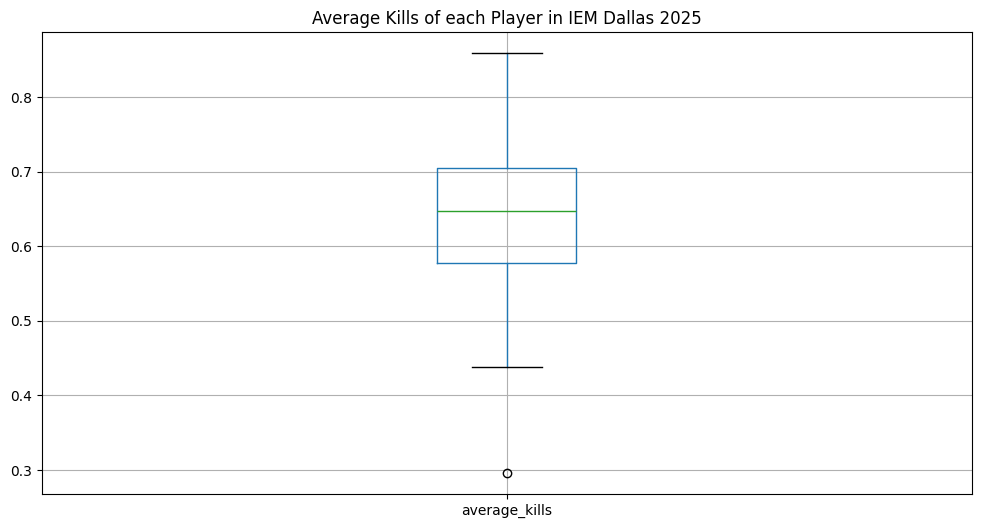

In [100]:
total_kills_per_player = iem_dallas_df.groupby("player_name")["player_kills"].sum()

total_rounds_per_player = iem_dallas_df.groupby("player_name")["round_id"].nunique().to_frame().reset_index()
total_rounds_per_player.rename(columns={"round_id": "total_rounds"}, inplace=True)


overall_average_kills_per_player_df = pd.merge(total_kills_per_player, total_rounds_per_player, on="player_name")
overall_average_kills_per_player_df['average_kills'] = overall_average_kills_per_player_df["player_kills"] / overall_average_kills_per_player_df["total_rounds"]


overall_average_kills_per_player_df.boxplot('average_kills', figsize=(12, 6))
plt.pyplot.title("Average Kills of each Player in IEM Dallas 2025")
plt.pyplot.show()



### Average Deaths of each Player in IEM Dallas 2025

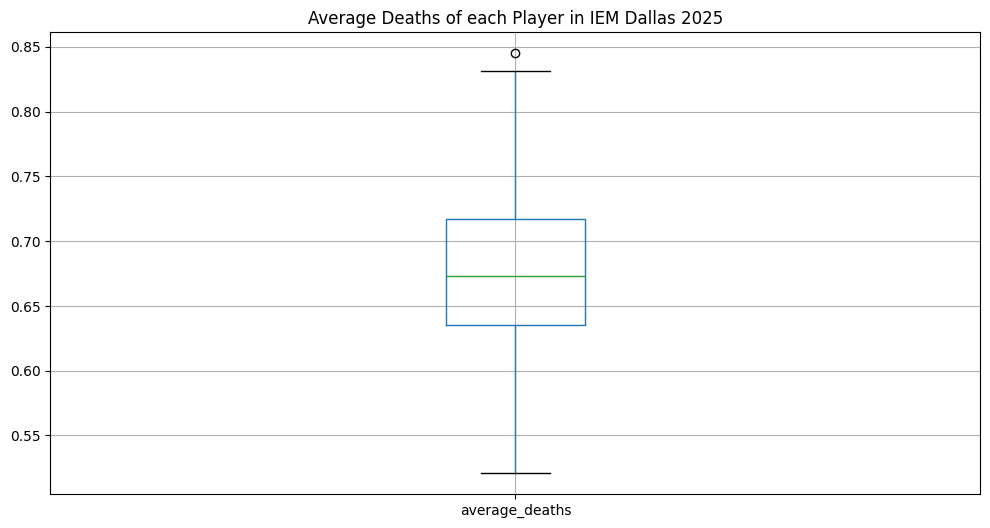

In [101]:
total_deaths_per_player = iem_dallas_df.loc[iem_dallas_df['player_died'] == True].groupby('player_name')['player_died'].count().to_frame()
total_deaths_per_player.rename(columns={'player_died': 'total_deaths'}, inplace=True)

overall_average_deaths_per_player_df = pd.merge(total_deaths_per_player, total_rounds_per_player, on="player_name")
overall_average_deaths_per_player_df['average_deaths'] = overall_average_deaths_per_player_df["total_deaths"] / overall_average_deaths_per_player_df["total_rounds"]

overall_average_deaths_per_player_df.boxplot('average_deaths', figsize=(12, 6))
plt.pyplot.title("Average Deaths of each Player in IEM Dallas 2025")
plt.pyplot.show()

### Player Spending

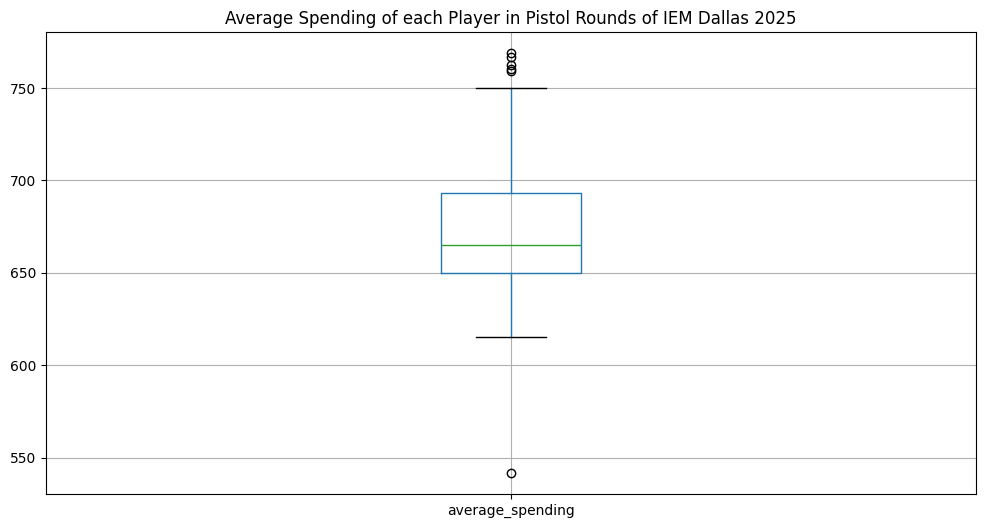

In [102]:
overall_spending_per_player_pistol_round = iem_dallas_df.loc[iem_dallas_df['round_number'] == 1].groupby('player_name')['player_spent_amount'].sum().to_frame()

total_pistol_rounds_per_player = iem_dallas_df.loc[iem_dallas_df['round_number'] == 1].groupby('player_name')['round_id'].nunique().to_frame().reset_index()
total_pistol_rounds_per_player.rename(columns={"round_id": "total_pistol"}, inplace=True)

overall_spending_per_player_pistol_round = pd.merge(overall_spending_per_player_pistol_round, total_pistol_rounds_per_player, on="player_name")
overall_spending_per_player_pistol_round['average_spending'] = overall_spending_per_player_pistol_round["player_spent_amount"] / overall_spending_per_player_pistol_round["total_pistol"]
overall_spending_per_player_pistol_round["round_type"] = "Pistol Round"

overall_spending_per_player_pistol_round.boxplot('average_spending', figsize=(12, 6))
plt.pyplot.title("Average Spending of each Player in Pistol Rounds of IEM Dallas 2025")
plt.pyplot.show()


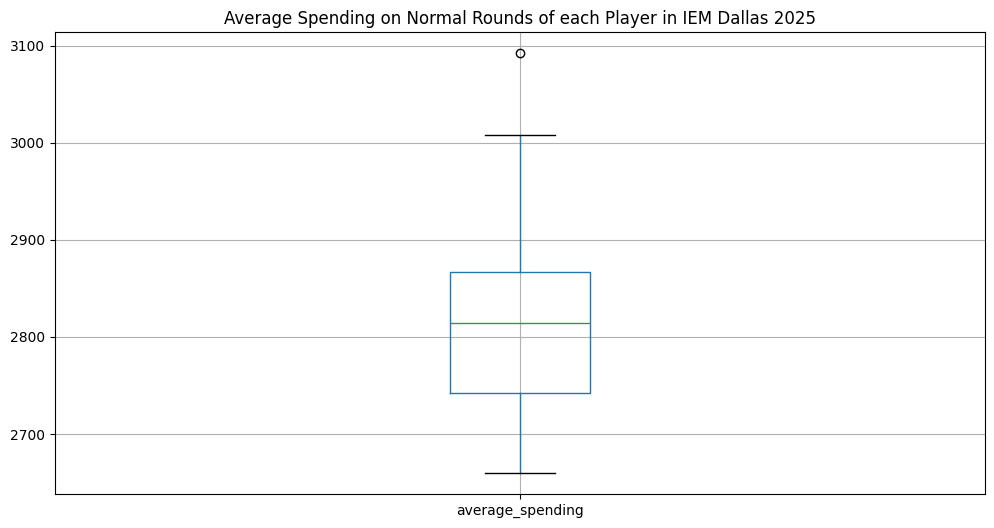

In [103]:
overall_spending_per_player_not_pistol_round = iem_dallas_df.loc[iem_dallas_df['round_number'] > 1].groupby('player_name')['player_spent_amount'].sum().to_frame()

total_rounds_per_player_not_pistol_round = iem_dallas_df.loc[iem_dallas_df['round_number'] > 1].groupby('player_name')['round_id'].nunique().to_frame().reset_index()
total_rounds_per_player_not_pistol_round.rename(columns={"round_id": "total_rounds"}, inplace=True)

overall_spending_per_player_not_pistol_round = pd.merge(overall_spending_per_player_not_pistol_round, total_rounds_per_player_not_pistol_round, on="player_name")
overall_spending_per_player_not_pistol_round['average_spending'] = overall_spending_per_player_not_pistol_round["player_spent_amount"] / overall_spending_per_player_not_pistol_round["total_rounds"]
overall_spending_per_player_not_pistol_round["round_type"] = "Normal Round"

overall_spending_per_player_not_pistol_round.boxplot('average_spending', figsize=(12, 6))
plt.pyplot.title("Average Spending on Normal Rounds of each Player in IEM Dallas 2025")
plt.pyplot.show()


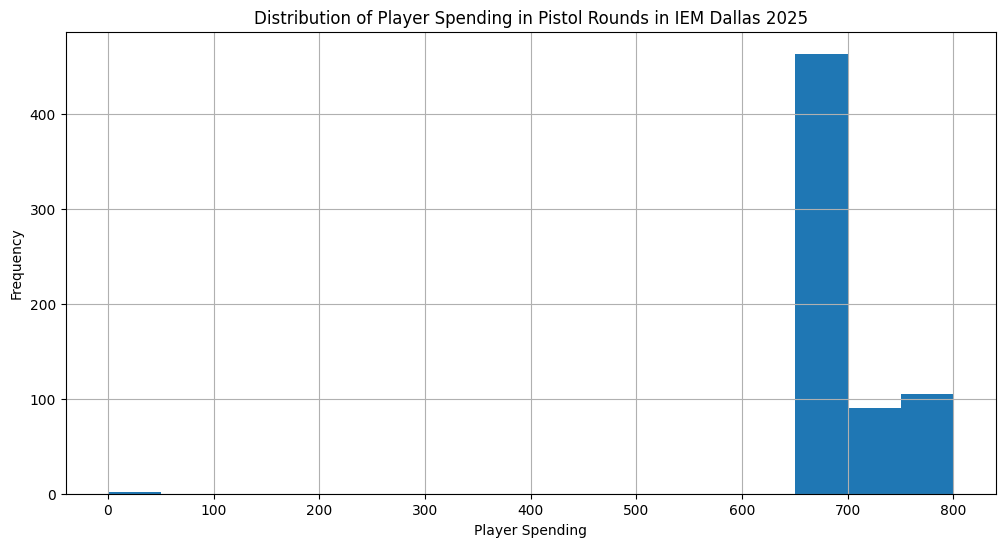

In [104]:
player_spending_pistol_rounds_df = iem_dallas_df.loc[iem_dallas_df['round_number'] == 1]

player_spending_pistol_rounds_df['player_spent_amount'].hist(bins=16, figsize=(12, 6))
plt.pyplot.title("Distribution of Player Spending in Pistol Rounds in IEM Dallas 2025")
plt.pyplot.xlabel("Player Spending")
plt.pyplot.ylabel("Frequency")
plt.pyplot.show()

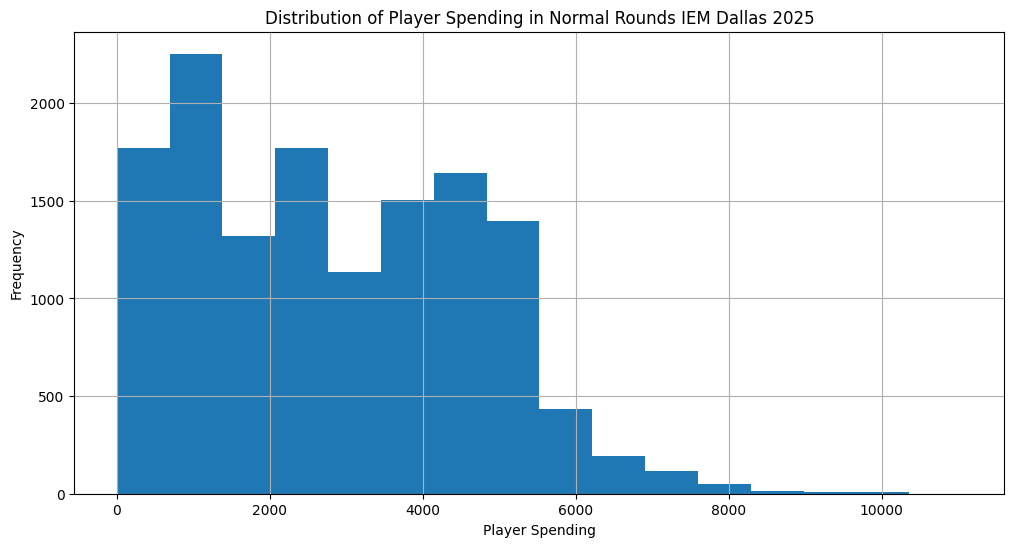

In [105]:
player_spending_not_pistol_rounds_df = iem_dallas_df.loc[iem_dallas_df['round_number'] > 1]

player_spending_not_pistol_rounds_df['player_spent_amount'].hist(bins=16, figsize=(12, 6))
plt.pyplot.title("Distribution of Player Spending in Normal Rounds IEM Dallas 2025")
plt.pyplot.xlabel("Player Spending")
plt.pyplot.ylabel("Frequency")
plt.pyplot.show()

#### Average Utilities Usage of Players Per Round

In [106]:
incendiaries_per_player_df = iem_dallas_df.groupby(['player_name'])['player_incendiaries_used'].sum()
incendiaries_per_player_df = incendiaries_per_player_df.to_frame().reset_index()
incendiaries_per_player_df.rename(columns={"player_incendiaries_used": "total_incendiaries"}, inplace=True)

total_rounds_per_player_df = iem_dallas_df.groupby(['player_name'])['round_id'].nunique().to_frame().reset_index()
total_rounds_per_player_df.rename(columns={"round_id": "total_rounds"}, inplace=True)

average_incendiaries_per_player_df = pd.merge(incendiaries_per_player_df, total_rounds_per_map_per_player_df, on=['player_name'])
average_incendiaries_per_player_df['average_incendiaries'] = average_incendiaries_per_player_df["total_incendiaries"] / average_incendiaries_per_player_df["total_rounds"]





In [107]:
flash_per_player_df = iem_dallas_df.groupby(['player_name'])['player_flashes_used'].sum()
flash_per_player_df = flash_per_player_df.to_frame().reset_index()
flash_per_player_df.rename(columns={"player_flashes_used": "total_flash"}, inplace=True)

average_flash_per_player_df = pd.merge(flash_per_player_df, total_rounds_per_player_df, on=['player_name'])
average_flash_per_player_df['average_flash'] = average_flash_per_player_df["total_flash"] / average_flash_per_player_df["total_rounds"]


In [108]:
smokes_per_player_df = iem_dallas_df.groupby(['player_name'])['player_smokes_used'].sum()
smokes_per_player_df = smokes_per_player_df.to_frame().reset_index()
smokes_per_player_df.rename(columns={"player_smokes_used": "total_smokes"}, inplace=True)

average_smokes_per_player_df = pd.merge(smokes_per_player_df, total_rounds_per_player_df, on=['player_name'])
average_smokes_per_player_df['average_smokes'] = average_smokes_per_player_df["total_smokes"] / average_smokes_per_player_df["total_rounds"]


In [109]:
grenades_per_player_df = iem_dallas_df.groupby(['player_name'])['player_grenades_used'].sum()
grenades_per_player_df = grenades_per_player_df.to_frame().reset_index()
grenades_per_player_df.rename(columns={"player_grenades_used": "total_grenades"}, inplace=True)

average_grenades_per_player_df = pd.merge(grenades_per_player_df, total_rounds_per_player_df, on=['player_name'])
average_grenades_per_player_df['average_grenades'] = average_grenades_per_player_df["total_grenades"] / average_grenades_per_player_df["total_rounds"]


In [ ]:
molotovs_per_player_df = iem_dallas_df.groupby(['player_name'])['player_molotovs_used'].sum()
molotovs_per_player_df = molotovs_per_player_df.to_frame().reset_index()
molotovs_per_player_df.rename(columns={"player_molotovs_used": "total_molotovs"}, inplace=True)

average_molotovs_per_player_df = pd.merge(molotovs_per_player_df, total_rounds_per_player_df, on=['player_name'])
average_molotovs_per_player_df['average_molotovs'] = average_molotovs_per_player_df["total_molotovs"] / average_molotovs_per_player_df["total_rounds"]


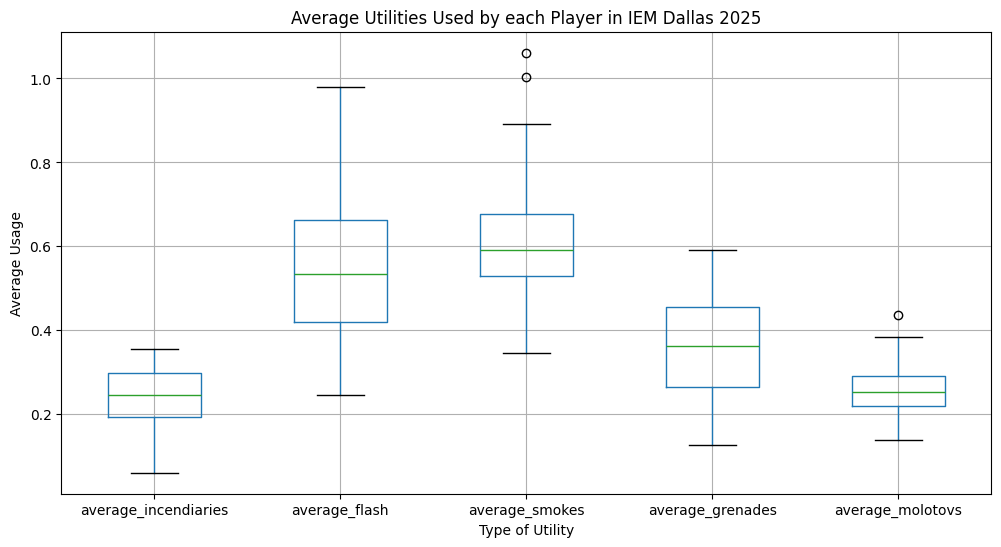

In [112]:
overall_utilities_per_player_df = pd.merge(average_incendiaries_per_player_df, average_flash_per_player_df, on=['player_name', 'total_rounds'])
overall_utilities_per_player_df = pd.merge(overall_utilities_per_player_df, average_smokes_per_player_df, on=['player_name', 'total_rounds'])
overall_utilities_per_player_df = pd.merge(overall_utilities_per_player_df, average_grenades_per_player_df, on=['player_name', 'total_rounds'])
overall_utilities_per_player_df = pd.merge(overall_utilities_per_player_df, average_molotovs_per_player_df, on=['player_name', 'total_rounds'])

overall_utilities_per_player_df.boxplot(['average_incendiaries', 'average_flash', 'average_smokes', 'average_grenades', 'average_molotovs'], figsize=(12, 6))
plt.pyplot.title("Average Utilities Used by each Player in IEM Dallas 2025")
plt.pyplot.xlabel("Type of Utility")
plt.pyplot.ylabel("Average Usage")
plt.pyplot.show()